In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error

# models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# ignore warnings
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

# Loading the DF
We also define other relevant constants.

In [48]:
# set categorical types
category_cols = ['Rating','Type','Status','Source','season','Studio','Producer']
int_cols = ['Rank','Episodes','Scored By','Popularity','Favorites','Members','Premier_Month']
float_cols = ['Score']

genres = ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi']
studios = ['Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit Studio']

types = dict([(i,'category') for i in category_cols])

df = pd.read_csv('cleaned_data.csv')
df = df.astype(types)

### Split the df

In [49]:
# calculate number of datapoints for train set
def split_dataset(df:object, train_set_ratio:float):
    """splits a dataset, with the size of train_set being determined by train_set_ratio
    @param df: The dataframe to split
    @param train_set_ratio: Float between 0 and 1 to determine the ratio of the df to be the train_set
    @returns train_set: The train set
    @returns test_set: The test set"""

    # shuffle the data so we don't just take the first 20% as test set.
    df = df.sample(frac=1).reset_index(drop=True)

    # calculate the splits
    entry_count = len(df.index)
    train_count = (int)(entry_count*train_set_ratio)

    # split
    train_set = df[:train_count]
    test_set = df[train_count:]

    print(f'total: {entry_count}\ntrain: {train_set.shape}\ntest: {test_set.shape}')
    return train_set, test_set

train_set, test_set = split_dataset(df,0.8)

total: 4281
train: (3424, 102)
test: (857, 102)


### Linear Regression code yanked from Exercise 4

In [50]:
def prediction_plot(x:str, train_set:pd.DataFrame, test_set:pd.DataFrame, results:dict):
    """just a helper function to plot predictions against actuals"""
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].scatter(train_set[[x]], results['train'], color = "blue")
    axes[0].plot(train_set[[x]], train_set[[x]], linewidth = 1, color = 'black')
    axes[0].set_xlabel(f"True values of {x}")
    axes[0].set_ylabel(f"Predicted values of {x}")
    axes[1].scatter(test_set[[x]], results['test'], color = "green")
    axes[1].plot(test_set[[x]], test_set[[x]], linewidth = 1, color='black')
    axes[1].set_xlabel(f"True values of {x}")
    axes[1].set_ylabel(f"Predicted values of {x}")
    plt.show()

def linear_regression(x:str, y:str, train_set:pd.DataFrame, test_set:pd.DataFrame):
    """does linear regression of variable y in the dataset against x. Can accept a list as y.
    @param x: The variable we want to predict
    @param y: The list of variables to perform regression on.
    @param train_set: The set used for training the model.
    @param test_set: The set used to test the model's accuracy.
    @returns R^2: The R^2 values of the model, train set then test set.
    @returns MSE: The MSE values of the model, train set then test set."""

    print(f'=============== {y} ===============')
    linreg = LinearRegression()
    # check if list
    if type(y) is list:
        linreg.fit(train_set[y],train_set[[x]])
    else:
        linreg.fit(train_set[[y]],train_set[[x]])

    # print the intercept & coef in the form y = m*x + c
    print(f"""Line Equation
        {x} = {linreg.coef_}*{y} + {linreg.intercept_}
        """)

    datasets = {'train':train_set, 'test':test_set}
    results = {}

    r2_arr = []
    mse_arr = []
    
    for name,dataset in datasets.items():
        if type(y) is list:
            datay = dataset[y]
        else:
            datay = dataset[[y]]
        pred = linreg.predict(datay)
        
        r2 = linreg.score(datay, dataset[[x]])
        mse = mean_squared_error(dataset[[x]], pred)

        r2_arr.append(r2)
        mse_arr.append(mse)

        print(f"""{name} dataset
        R^2: {r2}
        MSE: {mse}""")
        results[name] = pred

    prediction_plot(x,train_set,test_set,results)

    return r2_arr, mse_arr

### Performing Linear Regression

For Premier Month: Months passed since 1900 

=============== Rank ===============
Line Equation
        Score = [[-0.00024728]]*Rank + [8.05766903]
        
train dataset
        R^2: 0.9574236712799407
        MSE: 0.027233522689540407
test dataset
        R^2: 0.9479398625725689
        MSE: 0.033929404166847095


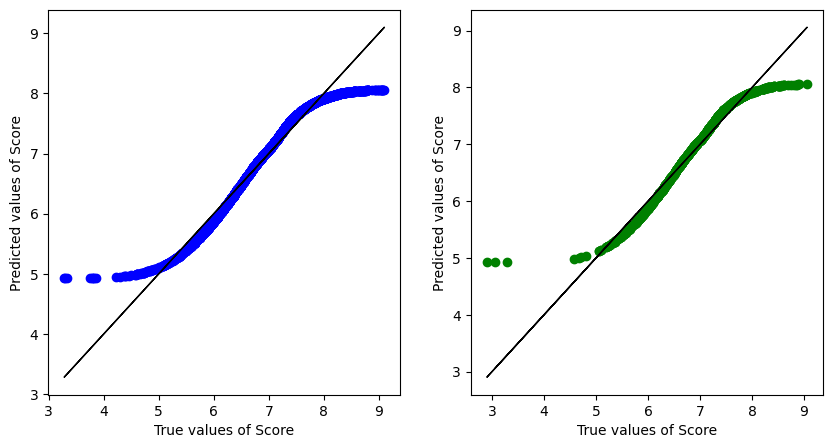

=============== Episodes ===============
Line Equation
        Score = [[9.25418398e-05]]*Episodes + [6.88814969]
        
train dataset
        R^2: 4.61509944311711e-05
        MSE: 0.6396104749763515
test dataset
        R^2: -0.0007912217309842262
        MSE: 0.6522504842803449


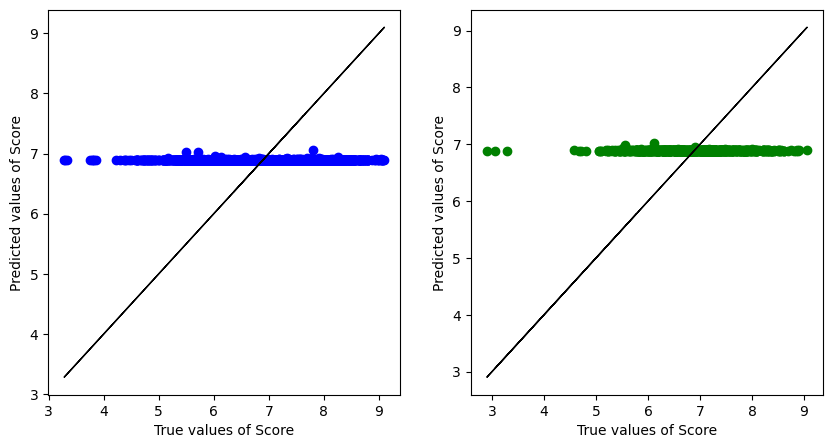

=============== Scored By ===============
Line Equation
        Score = [[1.57635322e-06]]*Scored By + [6.75828293]
        
train dataset
        R^2: 0.16554656774265242
        MSE: 0.5337497892353195
test dataset
        R^2: 0.19142123573384706
        MSE: 0.526978933387534


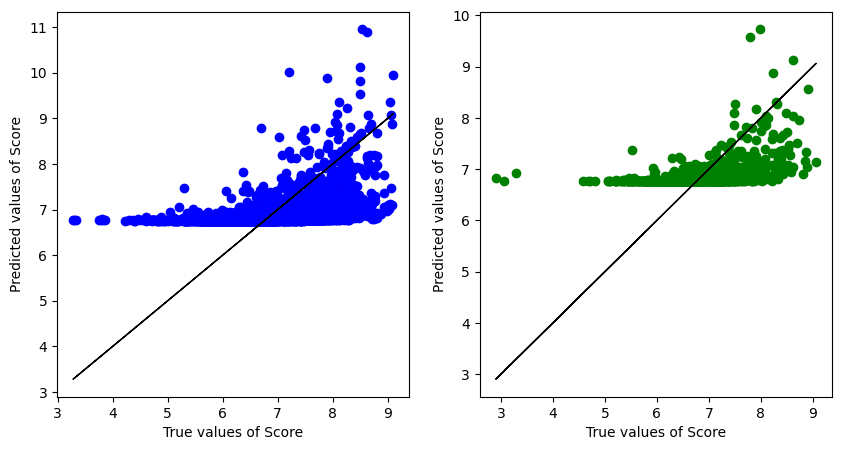

=============== Popularity ===============
Line Equation
        Score = [[-0.00010818]]*Popularity + [7.3929768]
        
train dataset
        R^2: 0.28545759365772505
        MSE: 0.45704990121877354
test dataset
        R^2: 0.31689104345346797
        MSE: 0.4452058911478782


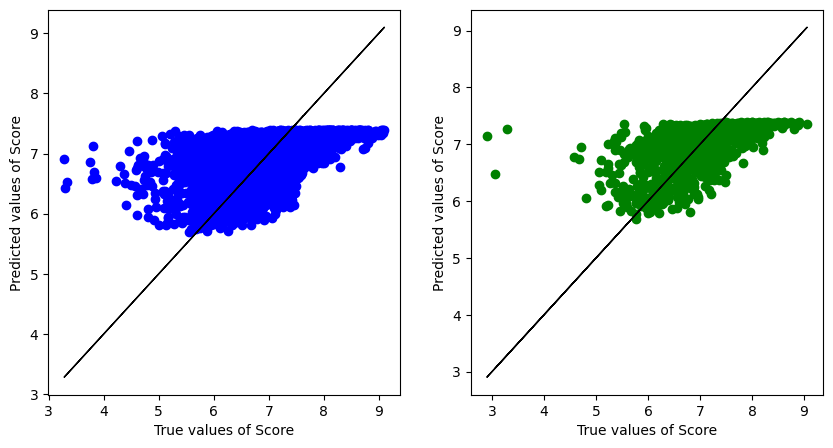

=============== Favorites ===============
Line Equation
        Score = [[2.6342041e-05]]*Favorites + [6.83357094]
        
train dataset
        R^2: 0.11188376412479295
        MSE: 0.5680746646730364
test dataset
        R^2: 0.1455036192864656
        MSE: 0.556905042764275


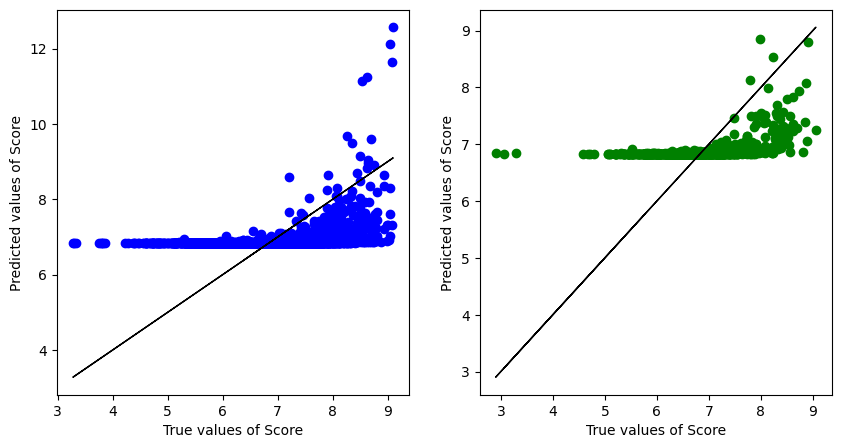

=============== Members ===============
Line Equation
        Score = [[1.06393187e-06]]*Members + [6.71849819]
        
train dataset
        R^2: 0.19977184165864914
        MSE: 0.5118579351988793
test dataset
        R^2: 0.236603053103129
        MSE: 0.4975323698886968


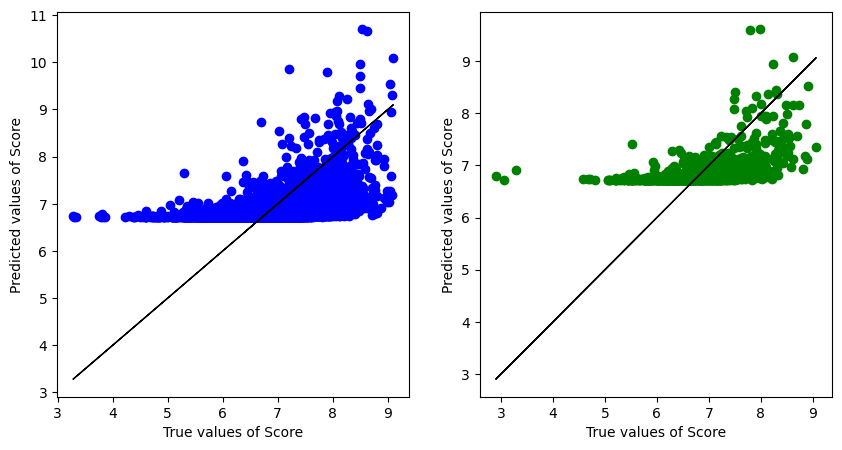

=============== Premier_Month ===============
Line Equation
        Score = [[0.00024685]]*Premier_Month + [6.56944358]
        
train dataset
        R^2: 0.0021116897637943888
        MSE: 0.6382892737682474
test dataset
        R^2: 0.006900660850574281
        MSE: 0.6472374165895917


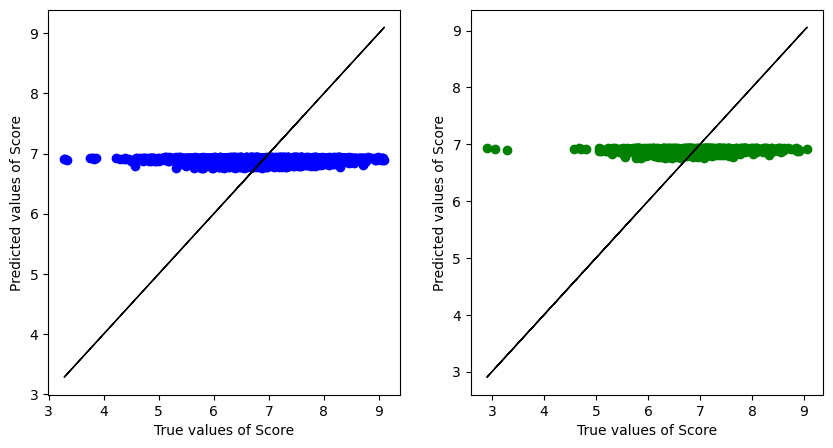

Rank regression
0 dataset
        R^2: 0.9574236712799407
        MSE: 0.027233522689540407
1 dataset
        R^2: 0.9479398625725689
        MSE: 0.033929404166847095
Episodes regression
0 dataset
        R^2: 4.61509944311711e-05
        MSE: 0.6396104749763515
1 dataset
        R^2: -0.0007912217309842262
        MSE: 0.6522504842803449
Scored By regression
0 dataset
        R^2: 0.16554656774265242
        MSE: 0.5337497892353195
1 dataset
        R^2: 0.19142123573384706
        MSE: 0.526978933387534
Popularity regression
0 dataset
        R^2: 0.28545759365772505
        MSE: 0.45704990121877354
1 dataset
        R^2: 0.31689104345346797
        MSE: 0.4452058911478782
Favorites regression
0 dataset
        R^2: 0.11188376412479295
        MSE: 0.5680746646730364
1 dataset
        R^2: 0.1455036192864656
        MSE: 0.556905042764275
Members regression
0 dataset
        R^2: 0.19977184165864914
        MSE: 0.5118579351988793
1 dataset
        R^2: 0.236603053103129
        MSE

In [51]:
regs = dict([(y , {}) for y in int_cols])
for y in int_cols:
    regs[y]['r2'], regs[y]['mse'] = linear_regression('Score',y,train_set=train_set, test_set=test_set)

for name, res in regs.items():
    print(f"{name} regression")
    for i in range(len(res['r2'])):
        print(f"""{i} dataset
        R^2: {res['r2'][i]}
        MSE: {res['mse'][i]}""")


# Testing Combinations of Variables
### Testing Popularity + Members
As the R^2 when using both `Members` + `Popularity` is better, we will use both.

=============== ['Popularity', 'Members'] ===============
Line Equation
        Score = [[-8.41665922e-05  5.92545178e-07]]*['Popularity', 'Members'] + [7.18555264]
        
train dataset
        R^2: 0.3333607780561688
        MSE: 0.42640910858975517
test dataset
        R^2: 0.37268017387622876
        MSE: 0.4088461724116497


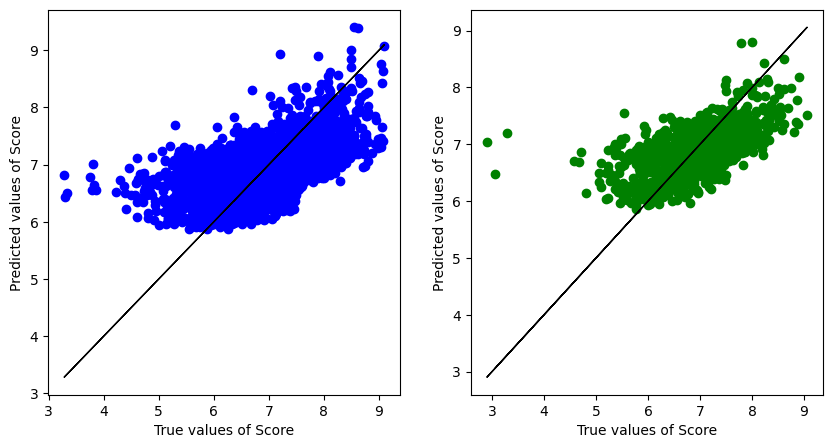

([0.3333607780561688, 0.37268017387622876],
 [0.42640910858975517, 0.4088461724116497])

In [52]:
y = ['Popularity', 'Members']
linear_regression(x='Score',y=y,train_set=train_set, test_set=test_set)

### Testing Popularity + Members + Favorites
As `Favorites` does not seem to help significantly, we can leave it out of future models.

=============== ['Popularity', 'Members', 'Favorites'] ===============
Line Equation
        Score = [[-8.85031000e-05  3.47940469e-07  9.30770617e-06]]*['Popularity', 'Members', 'Favorites'] + [7.22507358]
        
train dataset
        R^2: 0.3384082496709363
        MSE: 0.4231805438713317
test dataset
        R^2: 0.3794595710419172
        MSE: 0.4044278032369072


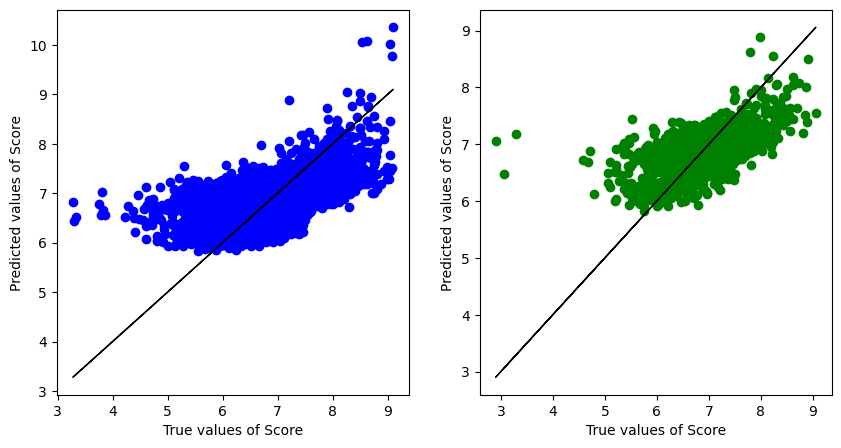

([0.3384082496709363, 0.3794595710419172],
 [0.4231805438713317, 0.4044278032369072])

In [53]:
y = ['Popularity', 'Members', 'Favorites']
linear_regression(x='Score',y=y,train_set=train_set, test_set=test_set)

## Adding Encoded Categorical data
We use popularity, and the encoded genres and studios. Using rank is cheating as it is based on score.

### Testing Numerical + Genres
Adding Genres seems to help the model predict better.

=============== ['Popularity', 'Members', 'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi'] ===============
Line Equation
        Score = [[-9.07612426e-05  5.98950030e-07 -3.52836078e-02  1.77554219e-01
  -1.07478492e-01  3.33857365e-01 -9.06697613e-02  6.71064149e-02
   2.38166342e-01 -9.85630704e-02 -1.86499922e-01  5.07947124e-02
  -4.02636842e-01  1.29129535e-01  9.50332242e-03  2.04098276e-02
   9.71477481e-02  2.57116470e-01  4.47873019e-02 -1.53947173e-03
  -4.87955566e-01]]*['Popularity', 'Members', 'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi'] + [7.13806078]
        
train dataset
        R^2: 0.4051529814776502
        

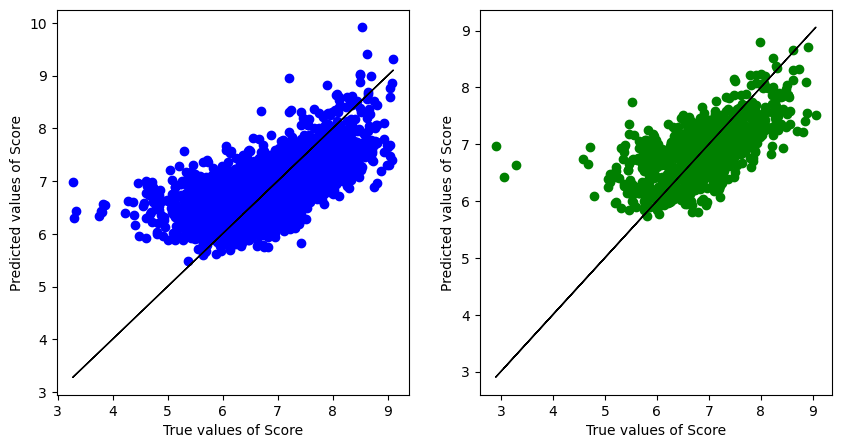

([0.4051529814776502, 0.41773684312452064],
 [0.38048794395232916, 0.37948117230061024])

In [54]:
y = ['Popularity', 'Members']
y = y + genres
linear_regression(x='Score',y=y,train_set=train_set, test_set=test_set)

### Testing Numerical + Studios
Adding Studios seems to help the model predict better.

=============== ['Popularity', 'Members', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit Studio'] ===============
Line Equation
        Score = [[-9.04977604e-05  5.22844194e-07  5.40549644e-01  5.90273378e-01
   2.66846102e-01  3.98296433e-01  2.18207832e-01  3.14736663e-01
   6.87664677e-01  3.67428089e-0

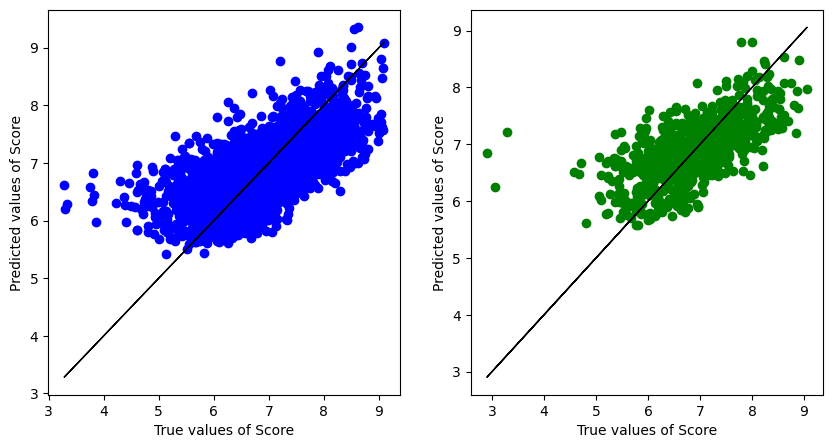

([0.4357598038040744, 0.4072641133608448],
 [0.3609105962725444, 0.3863066149221792])

In [55]:
y = ['Popularity', 'Members']
y = y + studios
linear_regression(x='Score',y=y,train_set=train_set, test_set=test_set)

# Final Variable Set
We use Popularity + Members + Genres + Studios, as they all seem to help with predictions.

In [56]:
y = ['Popularity', 'Members'] + genres + studios

## Testing Various Models
### Ordinary Least Squares
The most simple & basic form of regression. It has the best results of the tested models.

=============== ['Popularity', 'Members', 'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White F

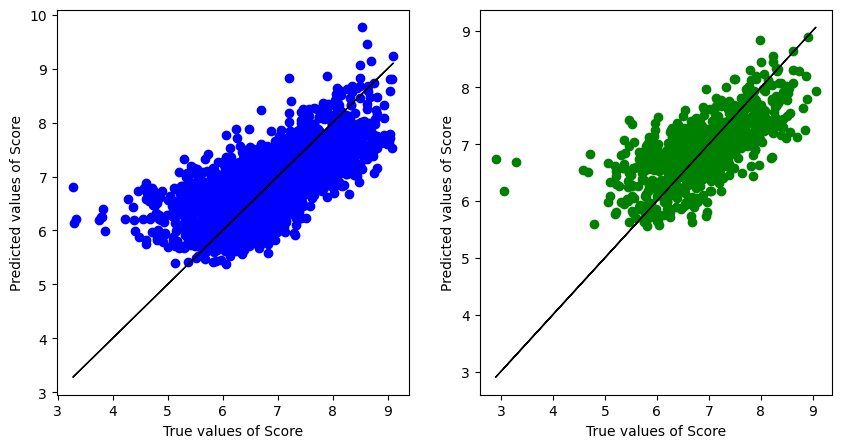

([0.4815140695186485, 0.44697646975881633],
 [0.331644337979728, 0.3604246895714658])

In [57]:
linear_regression(x='Score',y=y,train_set=train_set, test_set=test_set)

### K Nearest Neighbours
This doesn't seem to work very well, we need a high value of k (around 30) to get a decent R^2, suggesting too much generalisation

In [58]:
def knn(x:str, y:str, train_set:object, test_set:object, k:int):
    """does K nearest Neighbour regression of variable y in the dataset against x. Can accept a list as y.
    @param x: The variable we want to predict
    @param y: The list of variables to perform regression on.
    @param train_set: The set used for training the model.
    @param test_set: The set used to test the model's accuracy.
    @param k: The number of neighbours
    @returns R^2: The R^2 values of the model, train set then test set.
    @returns MSE: The MSE values of the model, train set then test set."""

    print(f'=============== {y} ===============')
    neighreg = KNeighborsRegressor(n_neighbors=k)
    # check if list
    if type(y) is list:
        neighreg.fit(train_set[y],train_set[[x]])
    else:
        neighreg.fit(train_set[[y]],train_set[[x]])


    datasets = {'train':train_set, 'test':test_set}
    results = {}

    r2_arr = []
    mse_arr = []
    
    for name,dataset in datasets.items():
        if type(y) is list:
            datay = dataset[y]
        else:
            datay = dataset[[y]]
        pred = neighreg.predict(datay)
        
        r2 = neighreg.score(datay, dataset[[x]])
        mse = mean_squared_error(dataset[[x]], pred)

        r2_arr.append(r2)
        mse_arr.append(mse)

        print(f"""{name} dataset
        R^2: {r2}
        MSE: {mse}""")
        results[name] = pred

    prediction_plot(x,train_set,test_set,results)

    return r2_arr, mse_arr

=== k = 5 ===
=============== ['Popularity', 'Members', 'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation F

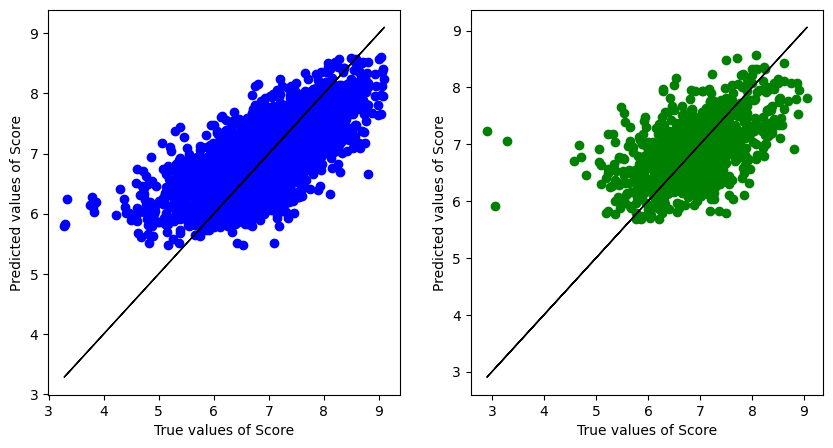

=== k = 10 ===
=============== ['Popularity', 'Members', 'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation 

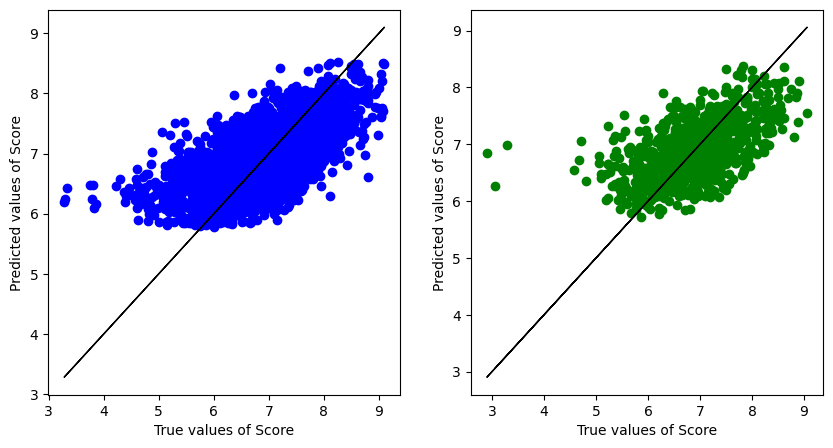

=== k = 15 ===
=============== ['Popularity', 'Members', 'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation 

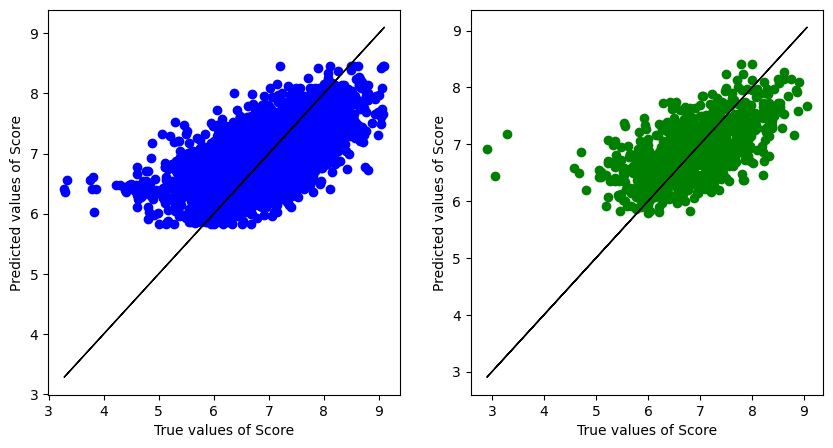

=== k = 20 ===
=============== ['Popularity', 'Members', 'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation 

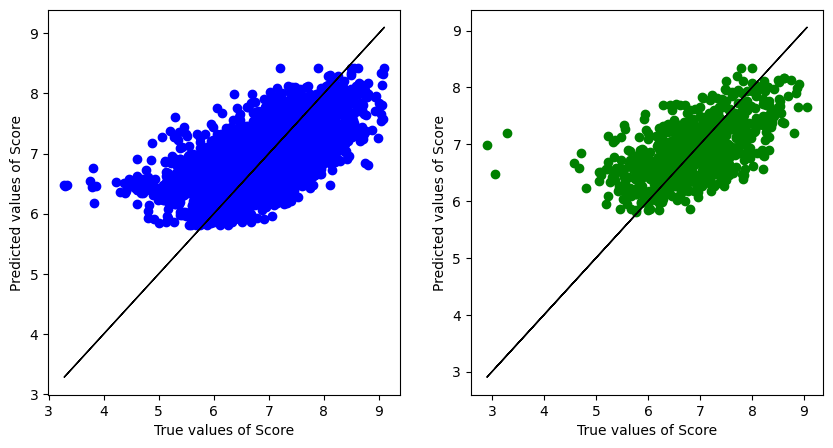

=== k = 25 ===
=============== ['Popularity', 'Members', 'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation 

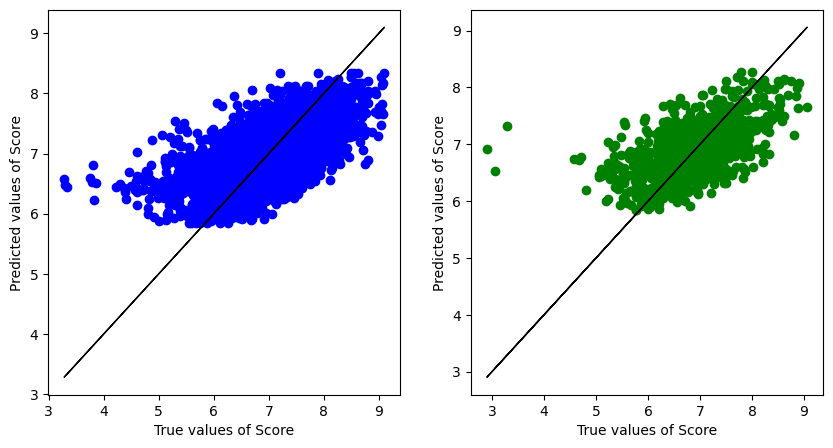

=== k = 30 ===
=============== ['Popularity', 'Members', 'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation 

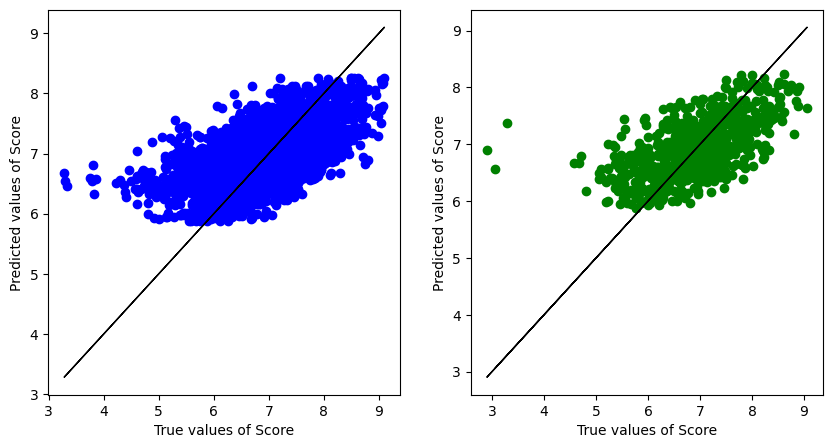

In [59]:
for i in range(5,35,5):
    print(f'=== k = {i} ===')
    knn(x='Score',y=y,train_set=train_set, test_set=test_set, k=i)

### Decision Tree
This seems to perform worse than Ordinary Least Squares, despite testing multiple depths.

In [60]:
def tree(x:str, y:str, train_set:object, test_set:object, max_depth:int=None):
    """does decision tree regression of variable y in the dataset against x. Can accept a list as y.
    @param x: The variable we want to predict
    @param y: The list of variables to perform regression on.
    @param train_set: The set used for training the model.
    @param test_set: The set used to test the model's accuracy.
    @param max_depth: maximum depth of tree
    @returns R^2: The R^2 values of the model, train set then test set.
    @returns MSE: The MSE values of the model, train set then test set."""

    print(f'=============== {y} ===============')
    treereg = DecisionTreeRegressor(max_depth=max_depth)
    # check if list
    if type(y) is list:
        treereg.fit(train_set[y],train_set[[x]])
    else:
        treereg.fit(train_set[[y]],train_set[[x]])

    datasets = {'train':train_set, 'test':test_set}
    results = {}

    r2_arr = []
    mse_arr = []
    
    for name,dataset in datasets.items():
        if type(y) is list:
            datay = dataset[y]
        else:
            datay = dataset[[y]]
        pred = treereg.predict(datay)
        
        r2 = treereg.score(datay, dataset[[x]])
        mse = mean_squared_error(dataset[[x]], pred)

        r2_arr.append(r2)
        mse_arr.append(mse)

        print(f"""{name} dataset
        R^2: {r2}
        MSE: {mse}""")
        results[name] = pred

    prediction_plot(x,train_set,test_set,results)

    return r2_arr, mse_arr

=== DEPTH = 3 ===
=============== ['Popularity', 'Members', 'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animati

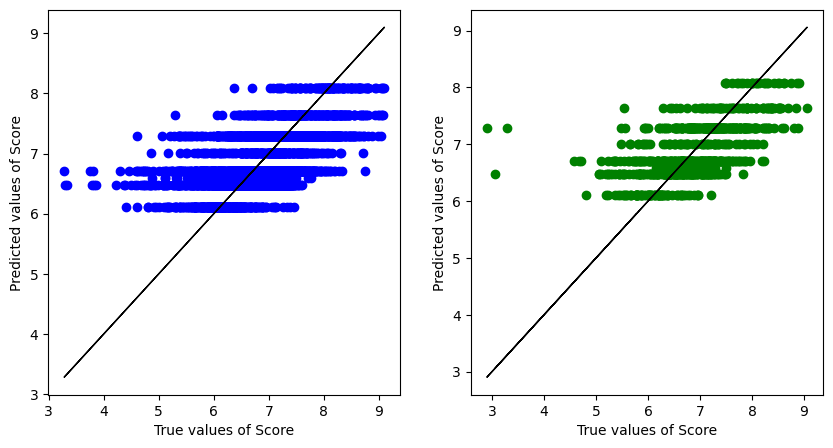

=== DEPTH = 4 ===
=============== ['Popularity', 'Members', 'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animati

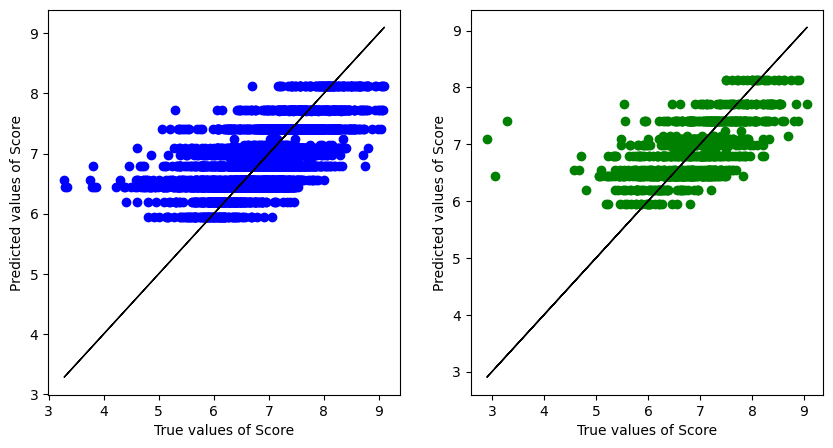

=== DEPTH = 5 ===
=============== ['Popularity', 'Members', 'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animati

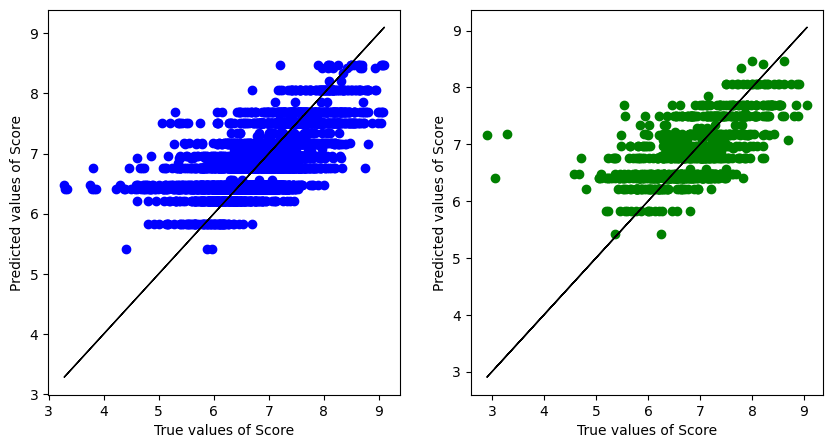

=== DEPTH = 6 ===
=============== ['Popularity', 'Members', 'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animati

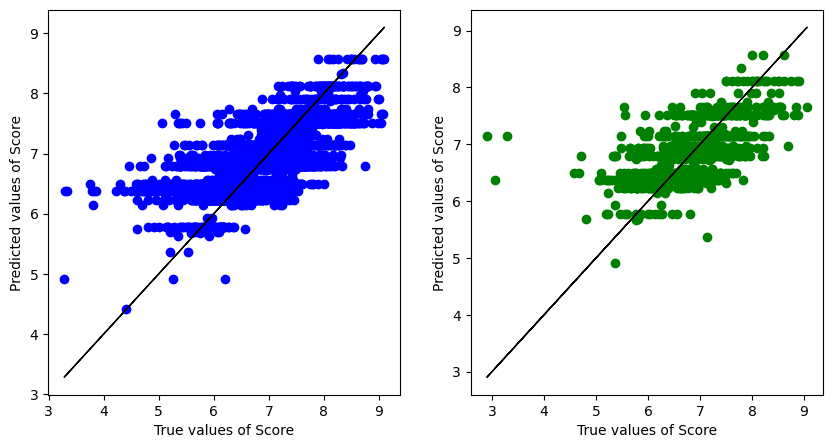

=== DEPTH = 7 ===
=============== ['Popularity', 'Members', 'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animati

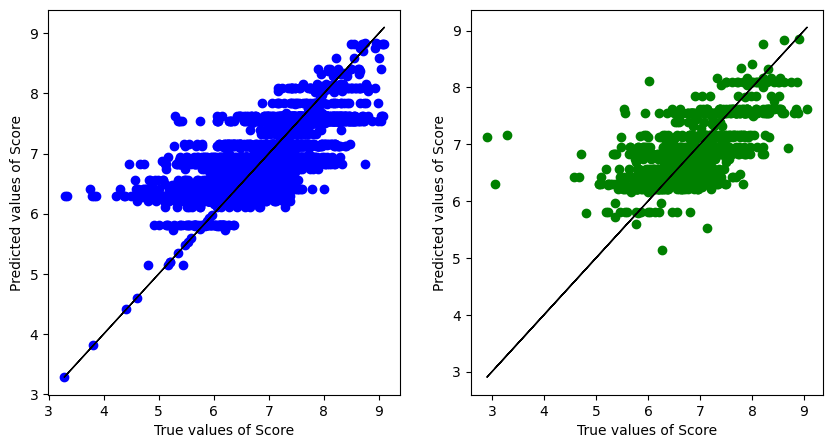

=== DEPTH = 8 ===
=============== ['Popularity', 'Members', 'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animati

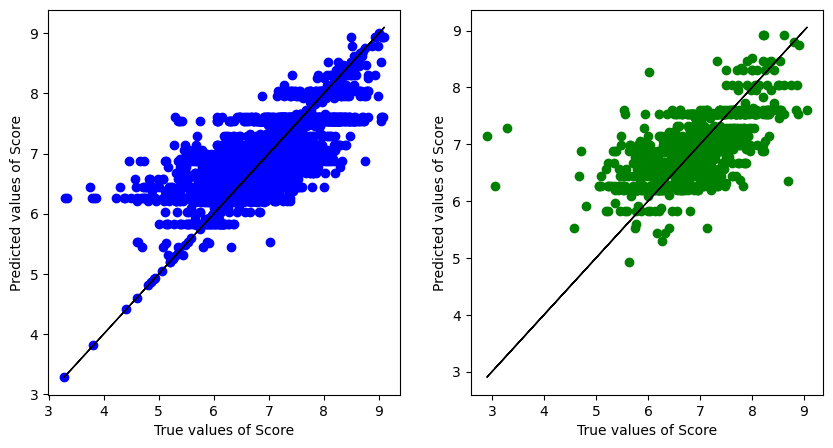

=== DEPTH = 9 ===
=============== ['Popularity', 'Members', 'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animati

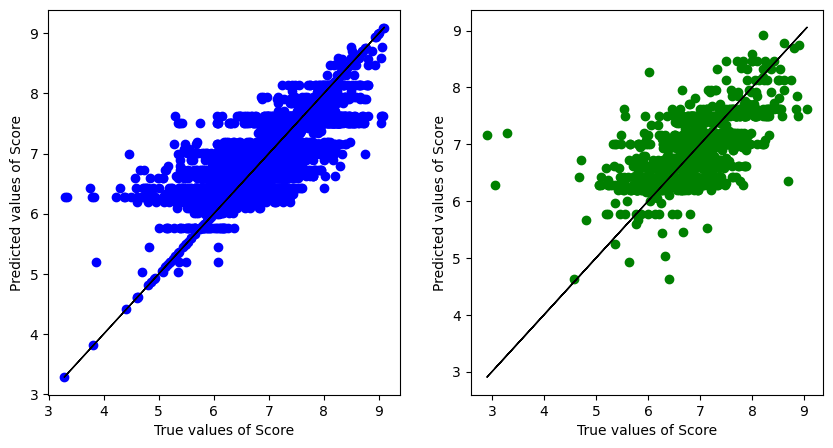

In [61]:
for i in range (3,10):
    print(f'=== DEPTH = {i} ===')
    tree(x='Score',y=y,train_set=train_set, test_set=test_set, max_depth=i)